<a href="https://colab.research.google.com/github/dilaraozcerit/Machine-Learning/blob/main/Used_car_price_prediction_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,10)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [81]:
df = pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Preparation

In [82]:
# car_name
df.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
KTM 390 Duke               1
TVS Jupyter                1
Honda CB Unicorn           1
Hero Honda CBZ extreme     1
Hero  CBZ Xtreme           1
Name: Car_Name, Length: 98, dtype: int64

In [83]:
df.drop("Car_Name", axis=1, inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [86]:
# year
df.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


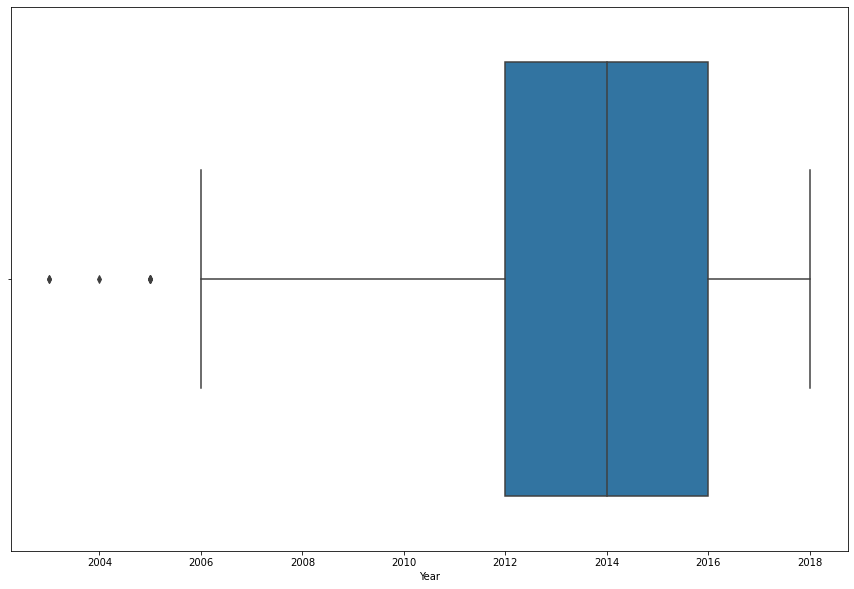

In [87]:
sns.boxplot(df.Year);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


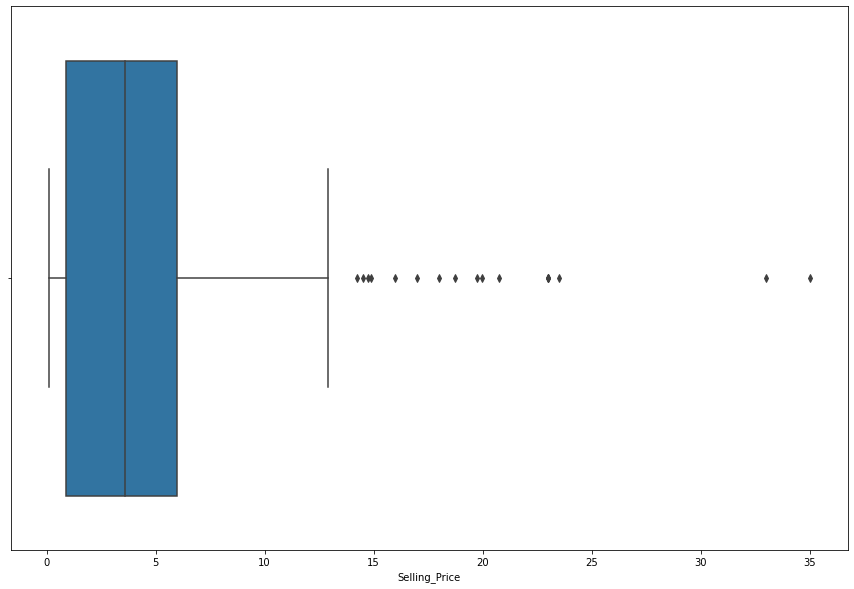

In [88]:
# Selling_Price
sns.boxplot(df.Selling_Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


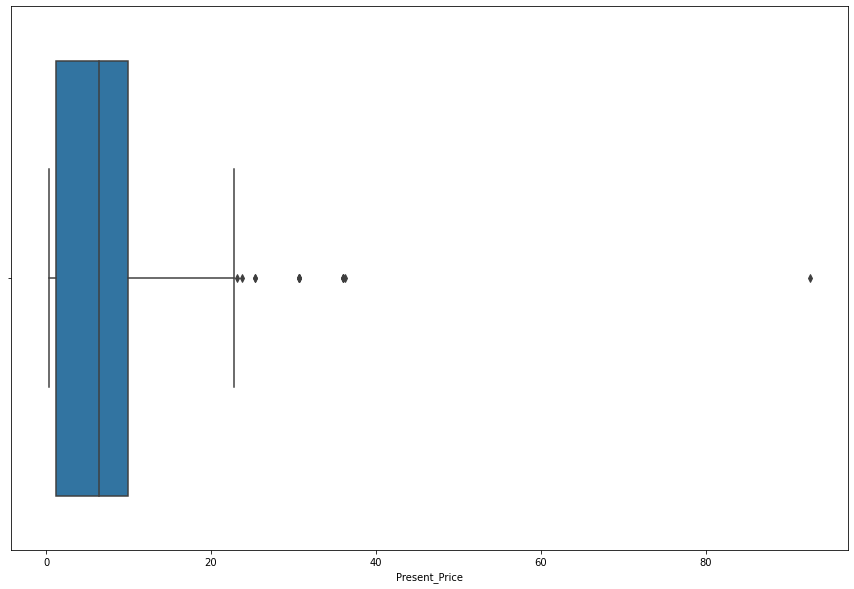

In [89]:
# Present_Price
sns.boxplot(df.Present_Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


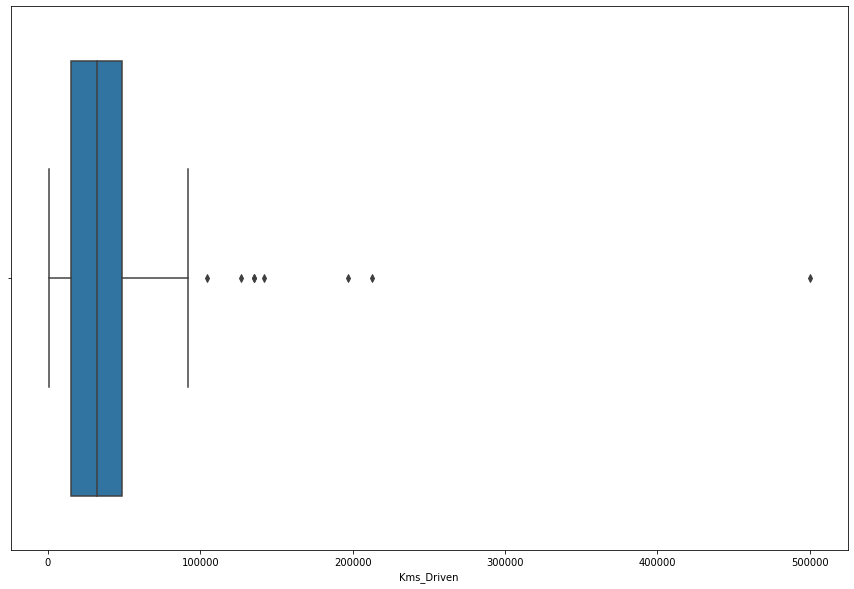

In [90]:
# Kms_Driven
sns.boxplot(df.Kms_Driven);

In [91]:
df.Kms_Driven.value_counts().sort_index()

500       2
1000      1
1200      1
1300      2
1400      1
         ..
135154    1
142000    1
197176    1
213000    1
500000    1
Name: Kms_Driven, Length: 206, dtype: int64

In [92]:
# Fuel_Type	
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [93]:
# Seller_Type	
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [94]:
# Transmission	
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [95]:
# Owner
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

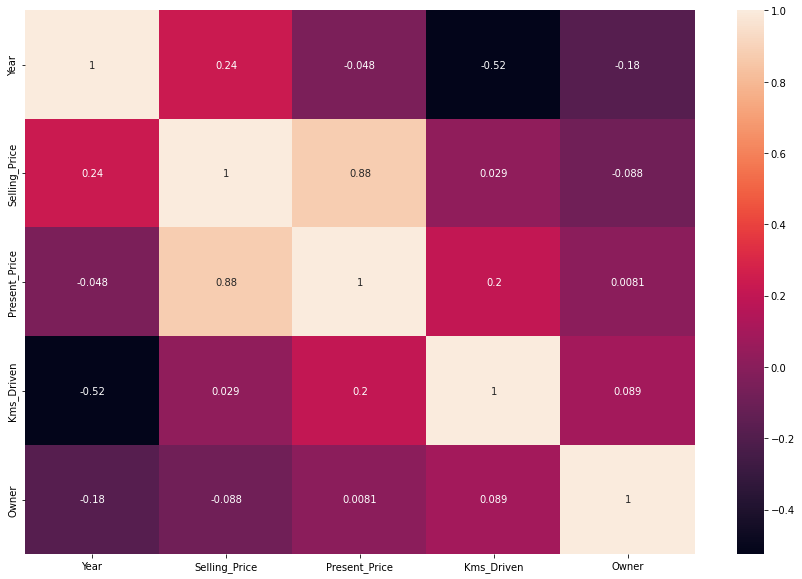

In [96]:
sns.heatmap(df.corr(), annot = True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


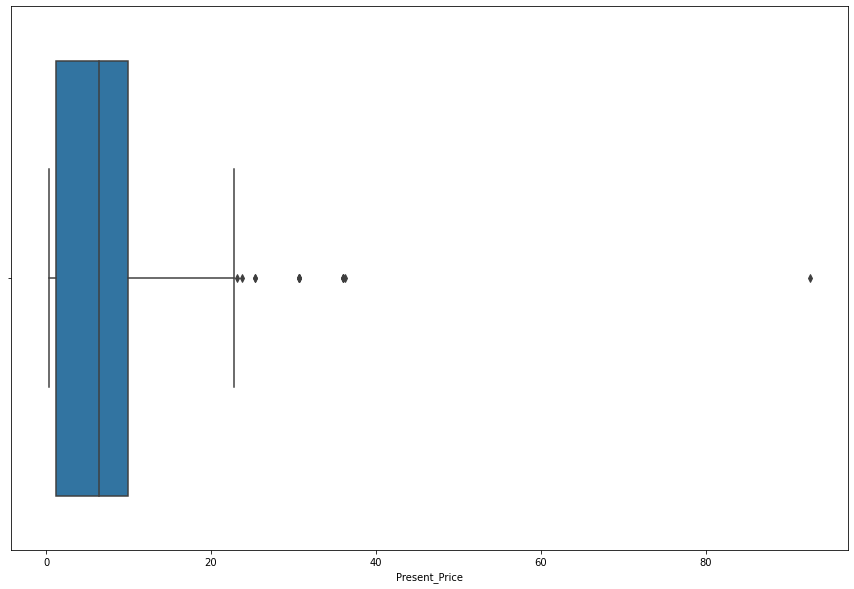

In [97]:
sns.boxplot(df.Present_Price);  # outliers !!!

In [98]:
df[df.Present_Price > 20]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
67,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0
69,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


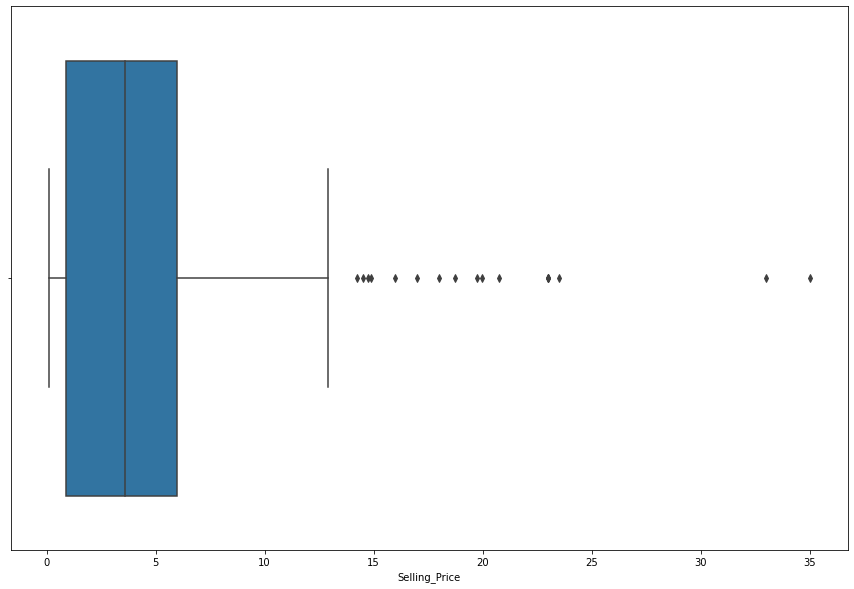

In [99]:
sns.boxplot(df.Selling_Price);   # outliers !!!

In [100]:
df.Present_Price.value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
9.29      1
92.60     1
13.70     1
1.17      1
0.65      1
Name: Present_Price, Length: 147, dtype: int64

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [101]:
df = df.join(df["Fuel_Type"].str.get_dummies(sep = ",").add_prefix("ft_"))
df = df.join(df["Seller_Type"].str.get_dummies(sep = ",").add_prefix("st_"))
df = df.join(df["Transmission"].str.get_dummies(sep = ",").add_prefix("t_"))

In [102]:
df.drop(["Fuel_Type", "Seller_Type", "Transmission", "ft_CNG"], axis=1, inplace=True)

In [103]:
df["car_age"] = 2018-df["Year"]

In [104]:
df.drop("Year", axis=1, inplace=True)

In [105]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Selling_Price,3.35,4.75,7.25,2.85,4.60,9.25,6.75,6.50,8.75,7.45,2.85,6.85,7.50,6.10,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.90,4.40,2.50,2.90,3.00,4.15,6.00,1.95,7.45,3.10,2.35,4.95,6.00,5.50,2.95,4.65,0.35,3.00,2.25,5.85,2.55,1.95,5.50,1.25,7.50,2.65,1.05,5.80,7.75,...,5.0,5.40,7.2,5.25,3.00,10.25,8.5,8.4,3.9,9.15,5.50,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.60,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.20,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.90,5.35,13.60,13.6,13.6,7.0,13.60,5.97,5.8,7.7,7.0,8.7,7.00,9.40,5.8,10.0,10.0,10.0,10.0,7.50,6.8,13.6,13.60,13.6,8.4,13.60,5.90,7.6,14.00,11.80,5.9,8.5,7.90,7.50,13.6,13.60,6.4,6.1,8.4,9.90,6.80,13.09,11.6,5.9,11.00,12.5,5.9
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00,2071.00,18796.00,33429.00,20273.00,42367.00,2135.00,51000.00,15000.00,26000.00,77427.00,43000.00,41678.00,43000.00,35500.00,41442.00,25000.00,2400.00,50000.00,45280.00,56879.00,20000.00,55138.00,16200.00,44542.00,45000.00,51439.00,54200.00,39000.00,45000.00,45000.00,49998.00,48767.00,127000.00,10079.00,62000.00,24524.00,46706.00,58000.00,45780.00,50000.00,15000.00,64532.00,65000.00,25870.00,37000.00,...,56701.0,31427.00,48000.0,54242.00,53675.00,49562.00,40324.0,25000.0,36054.0,29223.00,5600.00,40023.0,16002.0,40026.0,21200.0,35000.00,19434.00,19000.0,18828.0,69341.0,69562.0,27600.0,61203.00,16500.0,30753.0,24800.00,21780.0,4000.0,40126.00,14465.00,50456.0,63000.00,9010.00,9800.0,15059.0,28569.00,44000.00,34000.0,10980.00,19000.0,31427.0,12000.0,38000.00,33019.00,60076.00,33988.0,60000.0,87934.00,9000.0,5464.0
Owner,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
ft_Diesel,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,1.00,1.0,0.0,0.00,1.0,0.0
ft_Petrol,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,0.0,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.00,1.00,1.0,0.00,1.00,1.0,1.0,1.00,1.00,1.0,1.00,1.0,1.0,1.0,1.00,1.00,0.00,0.0,1.0,1.00,0.0,1.0
st_Dealer,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.

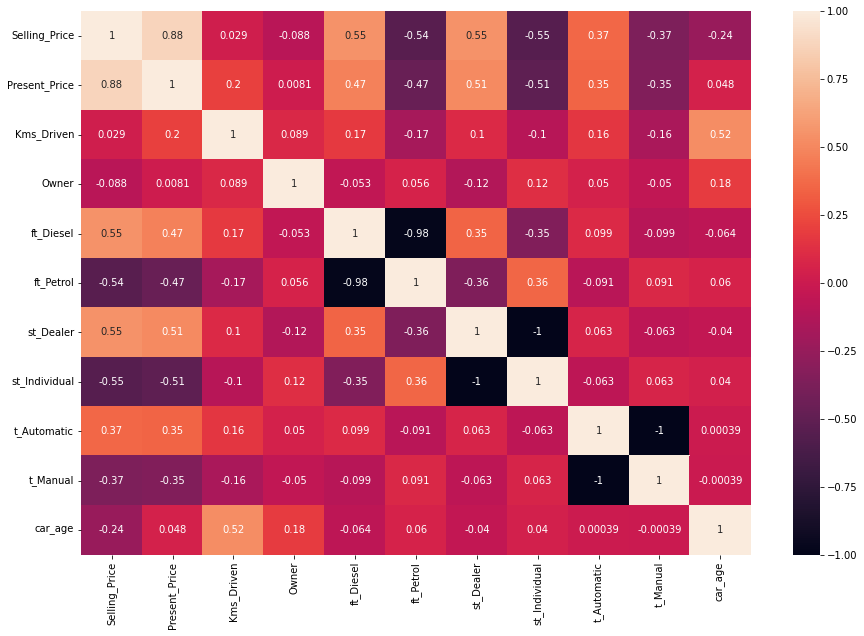

In [106]:
sns.heatmap(df.corr(), annot = True);

### Features and target variable

In [107]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

In [108]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Selling_Price,3.35,4.75,7.25,2.85,4.60,9.25,6.75,6.50,8.75,7.45,2.85,6.85,7.50,6.10,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.90,4.40,2.50,2.90,3.00,4.15,6.00,1.95,7.45,3.10,2.35,4.95,6.00,5.50,2.95,4.65,0.35,3.00,2.25,5.85,2.55,1.95,5.50,1.25,7.50,2.65,1.05,5.80,7.75,...,5.0,5.40,7.2,5.25,3.00,10.25,8.5,8.4,3.9,9.15,5.50,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.60,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.20,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.90,5.35,13.60,13.6,13.6,7.0,13.60,5.97,5.8,7.7,7.0,8.7,7.00,9.40,5.8,10.0,10.0,10.0,10.0,7.50,6.8,13.6,13.60,13.6,8.4,13.60,5.90,7.6,14.00,11.80,5.9,8.5,7.90,7.50,13.6,13.60,6.4,6.1,8.4,9.90,6.80,13.09,11.6,5.9,11.00,12.5,5.9
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00,2071.00,18796.00,33429.00,20273.00,42367.00,2135.00,51000.00,15000.00,26000.00,77427.00,43000.00,41678.00,43000.00,35500.00,41442.00,25000.00,2400.00,50000.00,45280.00,56879.00,20000.00,55138.00,16200.00,44542.00,45000.00,51439.00,54200.00,39000.00,45000.00,45000.00,49998.00,48767.00,127000.00,10079.00,62000.00,24524.00,46706.00,58000.00,45780.00,50000.00,15000.00,64532.00,65000.00,25870.00,37000.00,...,56701.0,31427.00,48000.0,54242.00,53675.00,49562.00,40324.0,25000.0,36054.0,29223.00,5600.00,40023.0,16002.0,40026.0,21200.0,35000.00,19434.00,19000.0,18828.0,69341.0,69562.0,27600.0,61203.00,16500.0,30753.0,24800.00,21780.0,4000.0,40126.00,14465.00,50456.0,63000.00,9010.00,9800.0,15059.0,28569.00,44000.00,34000.0,10980.00,19000.0,31427.0,12000.0,38000.00,33019.00,60076.00,33988.0,60000.0,87934.00,9000.0,5464.0
Owner,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
ft_Diesel,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,1.00,1.0,0.0,0.00,1.0,0.0
ft_Petrol,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,0.0,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.00,1.00,1.0,0.00,1.00,1.0,1.0,1.00,1.00,1.0,1.00,1.0,1.0,1.0,1.00,1.00,0.00,0.0,1.0,1.00,0.0,1.0
st_Dealer,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.

### Splitting data into training and testing

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =5)

In [111]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 10)
Train target shape   :  (210,)
Test features shape  :  (91, 10)
Test target shape    :  (91,)


In [112]:
df.sample(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,ft_Diesel,ft_Petrol,st_Dealer,st_Individual,t_Automatic,t_Manual,car_age
74,4.90,8.930,83000,0,1,0,1,0,0,1,4
262,4.00,5.800,40023,0,0,1,1,0,0,1,3
44,1.25,2.690,50000,0,0,1,1,0,0,1,6
73,2.65,5.710,43000,0,0,1,1,0,0,1,7
125,0.90,1.750,40000,0,0,1,0,1,0,1,9
175,0.38,0.787,75000,0,0,1,0,1,0,1,7
159,0.45,0.510,4000,0,0,1,0,1,1,0,1
182,0.30,0.580,30000,0,0,1,0,1,0,1,5
202,4.40,5.700,28200,0,0,1,1,0,0,1,3
257,8.50,13.600,40324,0,0,1,1,0,0,1,3


In [113]:
X_train

,Present_Price,Kms_Driven,Owner,ft_Diesel,ft_Petrol,st_Dealer,st_Individual,t_Automatic,t_Manual,car_age
95,18.61,72000,0,0,1,1,0,0,1,6
131,0.82,18000,0,0,1,0,1,0,1,3
75,6.80,36000,0,0,1,1,0,0,1,3
240,9.40,32322,0,1,0,1,0,0,1,6
83,13.46,38000,0,1,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
8,8.89,20273,0,1,0,1,0,0,1,2
73,5.71,43000,0,0,1,1,0,0,1,7
118,1.47,26000,0,0,1,0,1,0,1,3
189,0.57,55000,0,0,1,0,1,0,1,13


In [114]:
X_test

,Present_Price,Kms_Driven,Owner,ft_Diesel,ft_Petrol,st_Dealer,st_Individual,t_Automatic,t_Manual,car_age
67,20.45,59000,0,1,0,1,0,0,1,8
99,20.45,50024,0,1,0,1,0,0,1,8
266,7.00,35000,0,0,1,1,0,0,1,4
222,7.60,77632,0,1,0,1,0,0,1,4
24,4.41,56879,0,0,1,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...
2,9.85,6900,0,0,1,1,0,0,1,1
238,9.40,60241,0,0,1,1,0,0,1,5
23,3.46,45280,0,0,1,1,0,0,1,4
3,4.15,5200,0,0,1,1,0,0,1,7


In [115]:
y_train 

95      5.85
131     0.75
75      3.95
240     5.35
83     12.50
       ...  
8       8.75
73      2.65
118     1.10
189     0.20
206     5.75
Name: Selling_Price, Length: 210, dtype: float64

##  Model Building (Linear Regression)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
model = LinearRegression()

In [117]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s= scaler.transform(X_test)

In [118]:
lr_model = LinearRegression()
lr_model.fit(X_train_s, y_train)

LinearRegression()

In [119]:
model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = model.predict(X_test)
y_pred

array([10.74933493, 10.92058019,  4.44101091,  6.05471214,  2.55729993,
        9.14764678,  7.24493066,  1.45349428, 16.16852674,  4.77909426,
        6.86462932,  6.4344932 ,  3.46680476,  3.40202836, -0.70585675,
        4.22734937,  9.02701112, -0.39152813,  9.12238268,  1.14355592,
        7.39229243, 18.38580799, 19.68538868,  0.13353259,  2.10257624,
        4.78173668,  4.96975754,  6.85784514,  5.25494594,  5.41034303,
        4.39398319,  7.9225356 ,  5.92675622, -0.72018894,  0.6097048 ,
        7.14104854,  7.56157365,  5.47859751,  1.10669467,  0.98152493,
        2.03566266,  5.20146943, 14.15120483, -9.40493787,  1.34199353,
        3.88677849, -1.10203699,  8.61159283,  4.39555409,  4.82190632,
        5.37005082, 16.62827286,  0.75318811,  1.59781805,  1.73722691,
       -1.62041589,  2.86068603,  0.61429491, -1.87151248,  1.57534354,
        0.62632923,  2.85054305,  8.10813474, 10.19392655,  1.8157627 ,
        8.11263565,  0.74768319,  4.40797395,  2.39103615,  5.52

In [121]:
model.coef_

array([ 4.39653671e-01, -1.90781268e-05, -9.22463366e-01,  2.71067570e+00,
        5.47427977e-01,  6.64598715e-01, -6.64598715e-01,  5.84559596e-01,
       -5.84559596e-01, -3.27597634e-01])

In [122]:
model.intercept_

2.714093087337913

# Interpret the model

In [123]:
pd.DataFrame(lr_model.coef_, X_train.columns)

,0
Present_Price,40.505293
Kms_Driven,-4.054102
Owner,-2.767390
ft_Diesel,2.710676
ft_Petrol,0.547428
st_Dealer,0.664599
st_Individual,-0.664599
t_Automatic,0.584560
t_Manual,-0.584560
car_age,-4.586367


In [124]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [125]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
67,9.25,10.749335,-1.499335
99,9.65,10.920580,-1.270580
266,3.65,4.441011,-0.791011
222,6.00,6.054712,-0.054712
24,2.90,2.557300,0.342700
...,...,...,...
2,7.25,7.212912,0.037088
238,4.80,4.687031,0.112969
23,2.50,2.688514,-0.188514
3,2.85,2.773733,0.076267


In [126]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
67,9.25,10.749335,-1.499335
99,9.65,10.920580,-1.270580
266,3.65,4.441011,-0.791011
222,6.00,6.054712,-0.054712
24,2.90,2.557300,0.342700
282,8.25,9.147647,-0.897647
279,6.25,7.244931,-0.994931
138,0.60,1.453494,-0.853494
50,14.90,16.168527,-1.268527
234,5.50,4.779094,0.720906


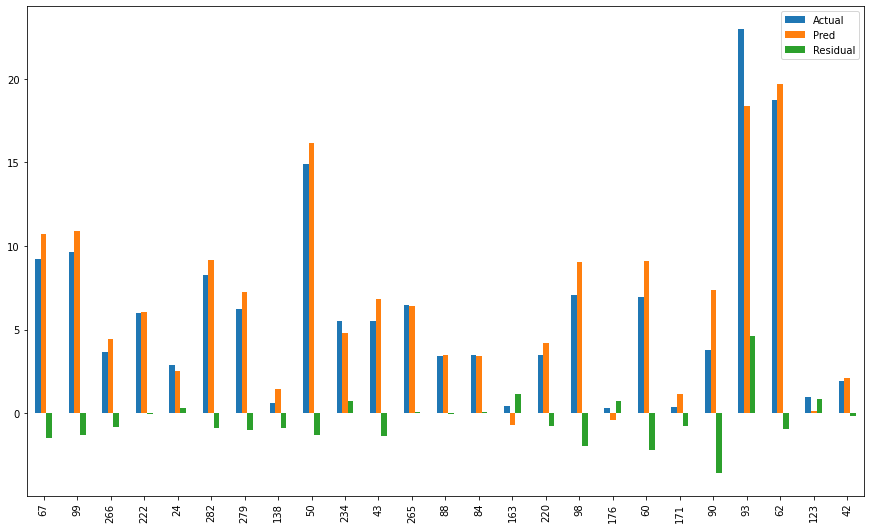

In [127]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

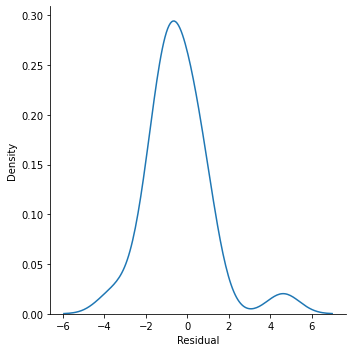

In [128]:
sns.displot(result_sample.Residual, kind="kde");  

In [129]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Model Evaluation

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score          # roor sqr error manuel hesaplicaz.

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [131]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8424640414594378
MAE 		: 1.1705720477434765
MSE 		: 3.357388968287041
RMSE 		: 1.8323179222741455


In [132]:
y_train_pred = model.predict(X_train)

In [133]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8860849787696148
MAE 		: 1.1599414207156482
MSE 		: 3.151242982591841
RMSE 		: 1.7751740710679167


# Regularization

In [135]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [136]:
from sklearn.model_selection import cross_validate, cross_val_score

In [137]:
model = LinearRegression()
scores = cross_validate(model, X_train_s, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [138]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.813179
test_neg_mean_absolute_error       -1.316943
test_neg_mean_squared_error        -5.551057
test_neg_root_mean_squared_error   -2.199909
dtype: float64

''

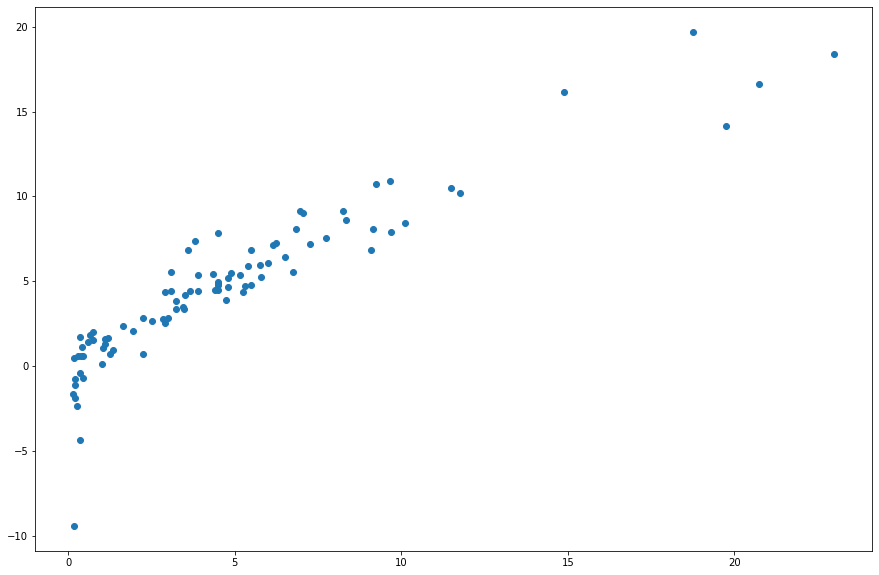

In [139]:
plt.scatter(y_test, y_pred,)
;

# Ridge

In [140]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_model = Ridge()
ridge_model.fit(X_train_s, y_train)

Ridge()

In [141]:
y_pred = ridge_model.predict(X_test_s)
y_train_pred = ridge_model.predict(X_train_s)

In [142]:
ridge_model.score(X_train_s, y_train), ridge_model.score(X_test_s, y_test)

(0.815490452550983, 0.8241362631199196)

In [143]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.2, 10, 100), cv=10, scoring="neg_root_mean_squared_error")

ridgecv_model.fit(X_train_s, y_train)
y_pred = ridgecv_model.predict(X_test_s)

In [152]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") # 0.67 bizim tek seferlik skorumuz.
rcs

,ridge_cv_train,ridge_cv_test
R2,0.240106,0.267068
mae,2.913811,2.688436
mse,21.021029,15.620165
rmse,4.584870,3.952235


# Lasso

In [144]:
from sklearn.linear_model import Lasso, LassoCV

In [145]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_s, y_train)

Lasso(alpha=1, random_state=42)

In [146]:
y_pred = lasso_model.predict(X_test_s)
y_train_pred = lasso_model.predict(X_train_s)

In [147]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.166619,0.188830
mae,3.066665,2.832061
mse,23.053897,17.287571
rmse,4.801447,4.157833


## Elastic-Net 

In [148]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [149]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_s, y_train)

ElasticNet(alpha=1, random_state=42)

In [150]:
y_pred = elastic_model.predict(X_test_s)
y_train_pred = elastic_model.predict(X_train_s)

In [151]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.240106,0.267068
mae,2.913811,2.688436
mse,21.021029,15.620165
rmse,4.584870,3.952235
